# Evolution Analysis Notebook
Milestone 3 exploration of genetic algorithm runs, evaluation statistics, and tuning experiments.

## 1. Setup & Imports

In [ ]:
from pathlib import Path

from IPython.display import Image, display

from tictactoe.analysis import evaluator, plots, tuning
from tictactoe.analysis.evaluator import aggregate_outcomes_by_opponent
from tictactoe.board import Board

RESULTS_DIR = Path("results")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

## 2. Run or Load GA Experiment

In [7]:
config = evaluator.EvaluationConfig(
    runs=10,
    board_factory=lambda: Board(),
    pop_size=8,
    generations=50,
    cx_pb=0.5,
    mut_pb=0.2,
    n_games=20,
    games_per_match=4,
    base_seed=42,
)
series = evaluator.run_evaluation_series(config)
experiment_paths = evaluator.export_evaluation(series, RESULTS_DIR / "experiment")
experiment_paths

Starting evaluation series: runs=10, pop=8, gens=50
  Running evaluation 1/10...
gen	nevals	avg   	max   	min   
0  	8     	0.4125	0.6375	0.3375
1  	5     	0.415625	0.65  	0.2625
2  	5     	0.478125	0.65  	0.4   
3  	7     	0.615625	0.65  	0.425 
4  	8     	0.65    	0.65  	0.65  
5  	3     	0.65    	0.65  	0.65  
6  	4     	0.65    	0.65  	0.65  
7  	6     	0.65    	0.65  	0.65  
8  	2     	0.65    	0.65  	0.65  
9  	4     	0.635938	0.65  	0.5375
10 	3     	0.65    	0.65  	0.65  
11 	5     	0.590625	0.65  	0.4125
12 	6     	0.620313	0.65  	0.4375
13 	4     	0.578125	0.65  	0.325 
14 	6     	0.61875 	0.65  	0.4   
15 	6     	0.607812	0.65  	0.3125
16 	7     	0.64375 	0.65  	0.6   
17 	8     	0.595313	0.65  	0.4125
18 	3     	0.646875	0.65  	0.625 
19 	5     	0.65    	0.65  	0.65  
20 	7     	0.614063	0.65  	0.3625
21 	6     	0.653125	0.675 	0.65  
22 	4     	0.653125	0.675 	0.65  
23 	5     	0.626563	0.675 	0.4375
24 	8     	0.58125 	0.675 	0.425 
25 	3     	0.653125	0.675 	0.65  
26 	4

{'json': WindowsPath('results/notebook/experiment.json'),
 'csv': WindowsPath('results/notebook/experiment.csv')}

## 3. Visualization

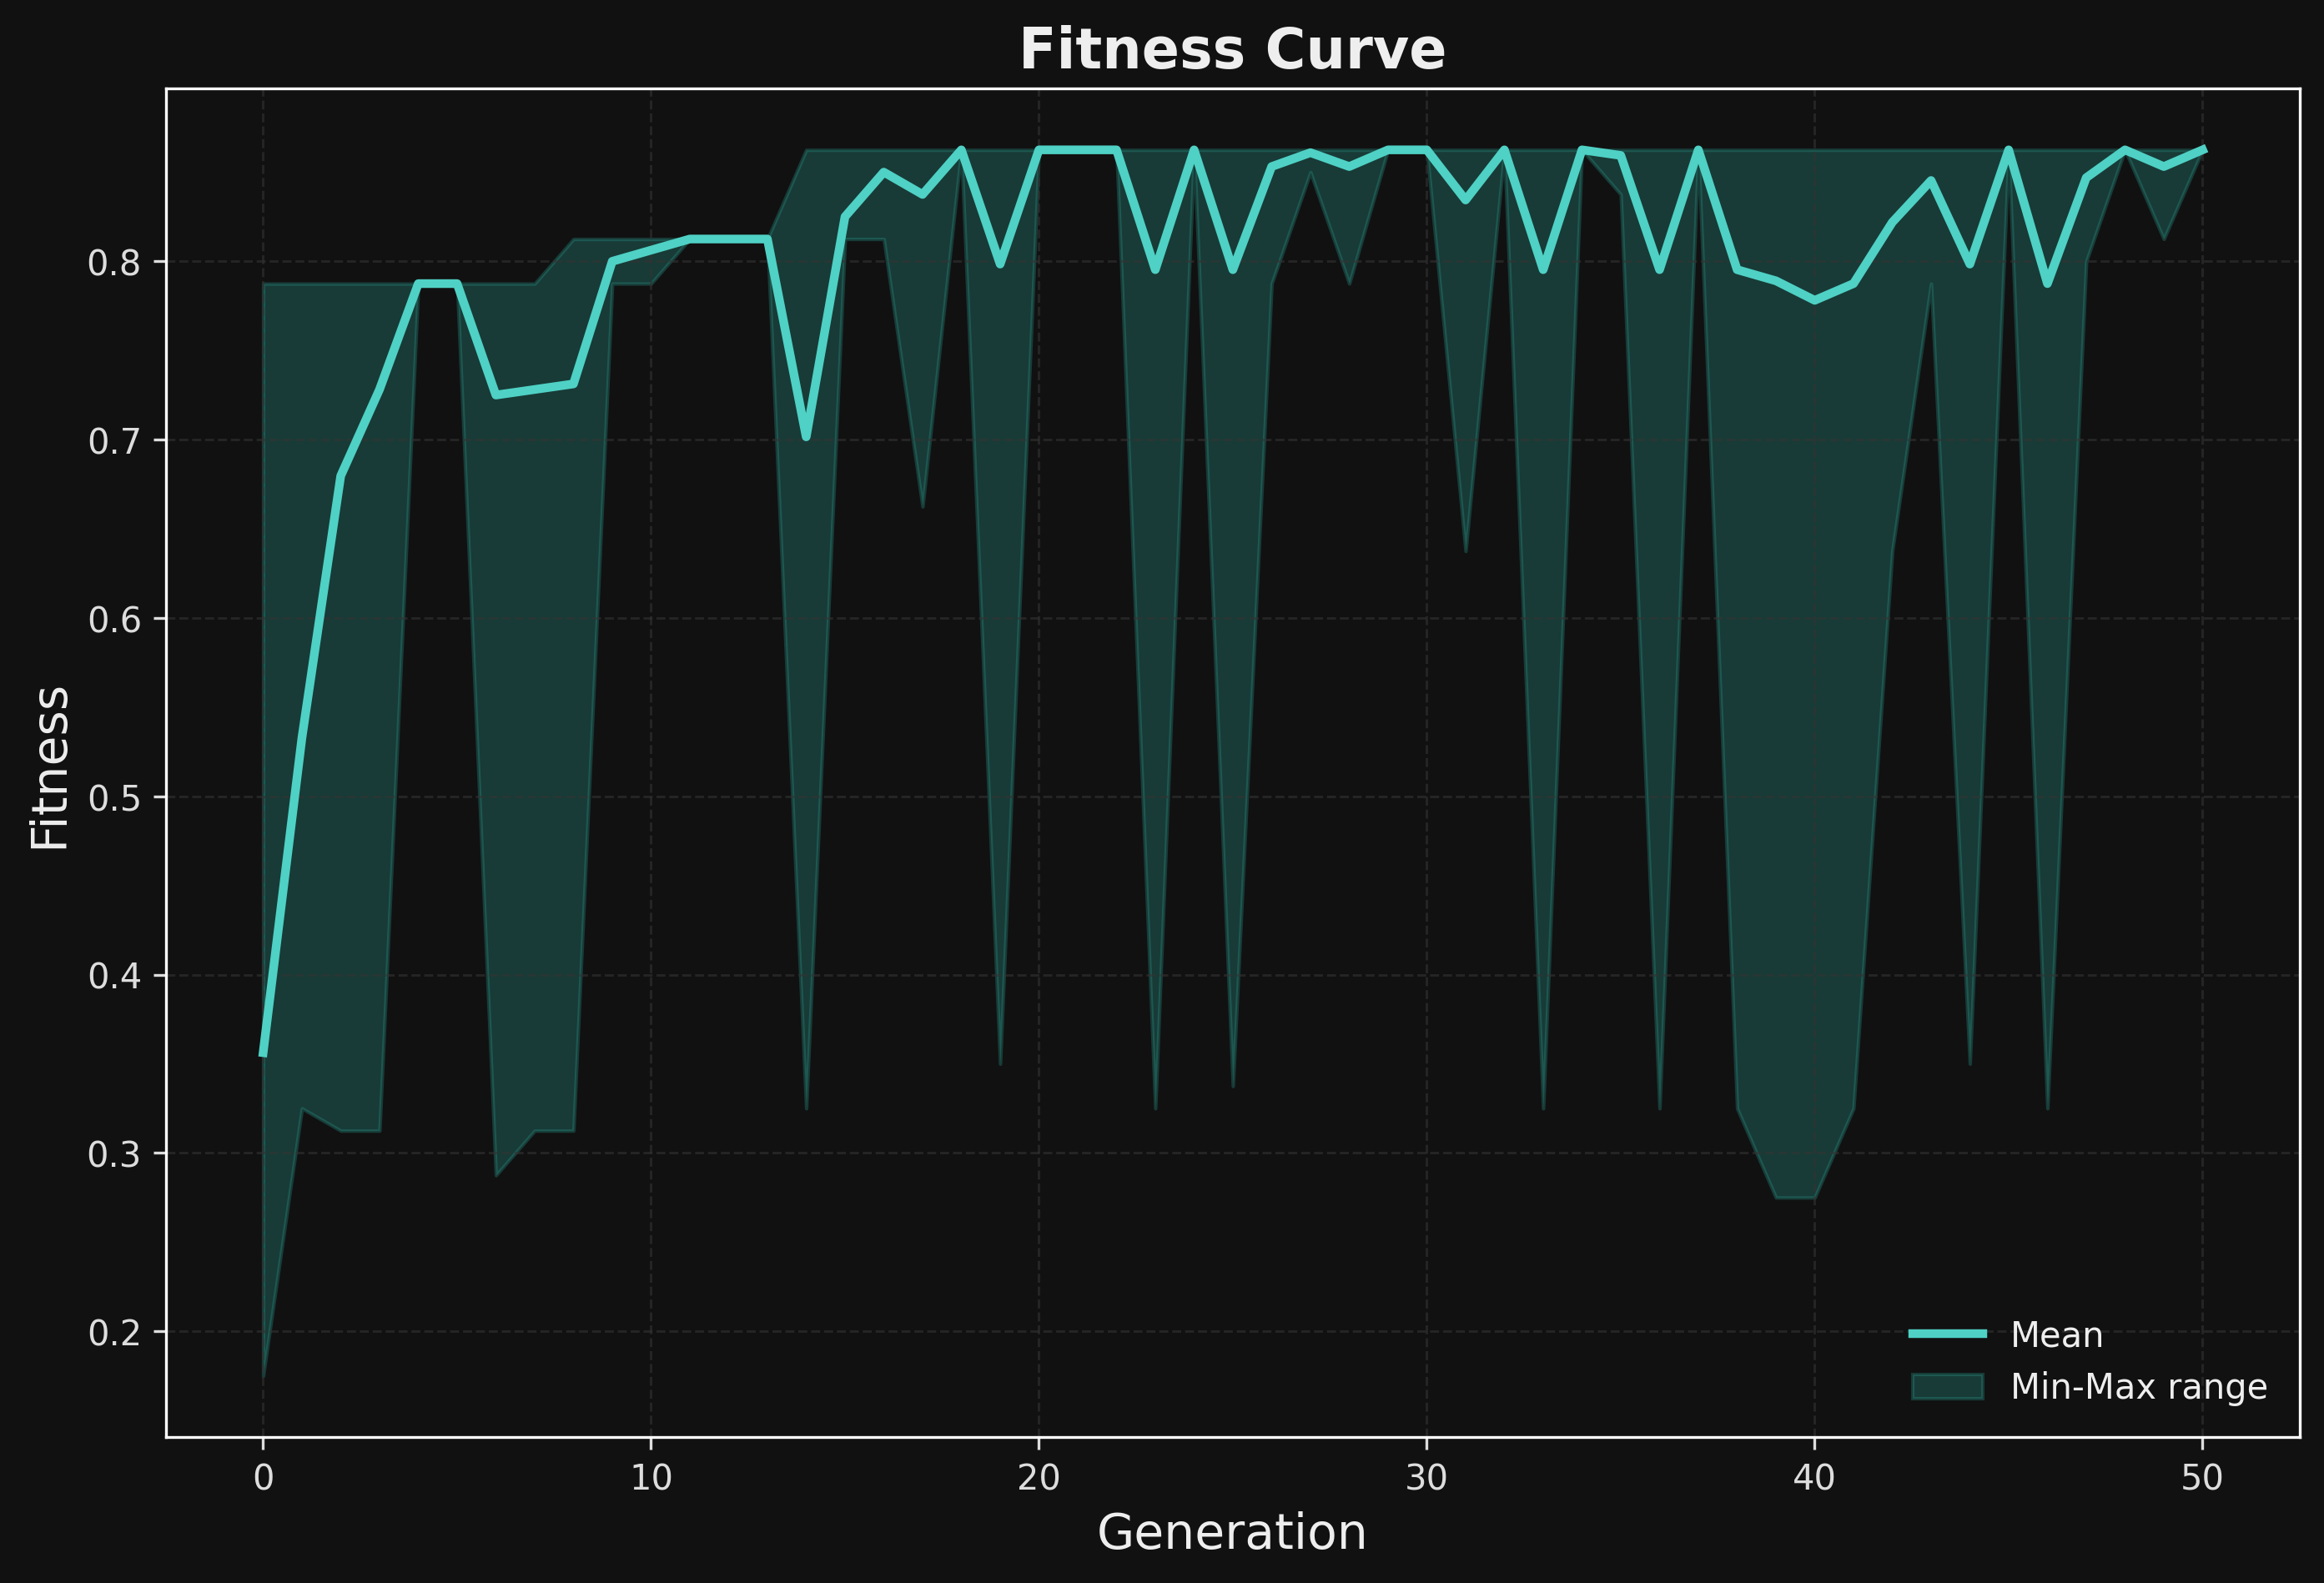

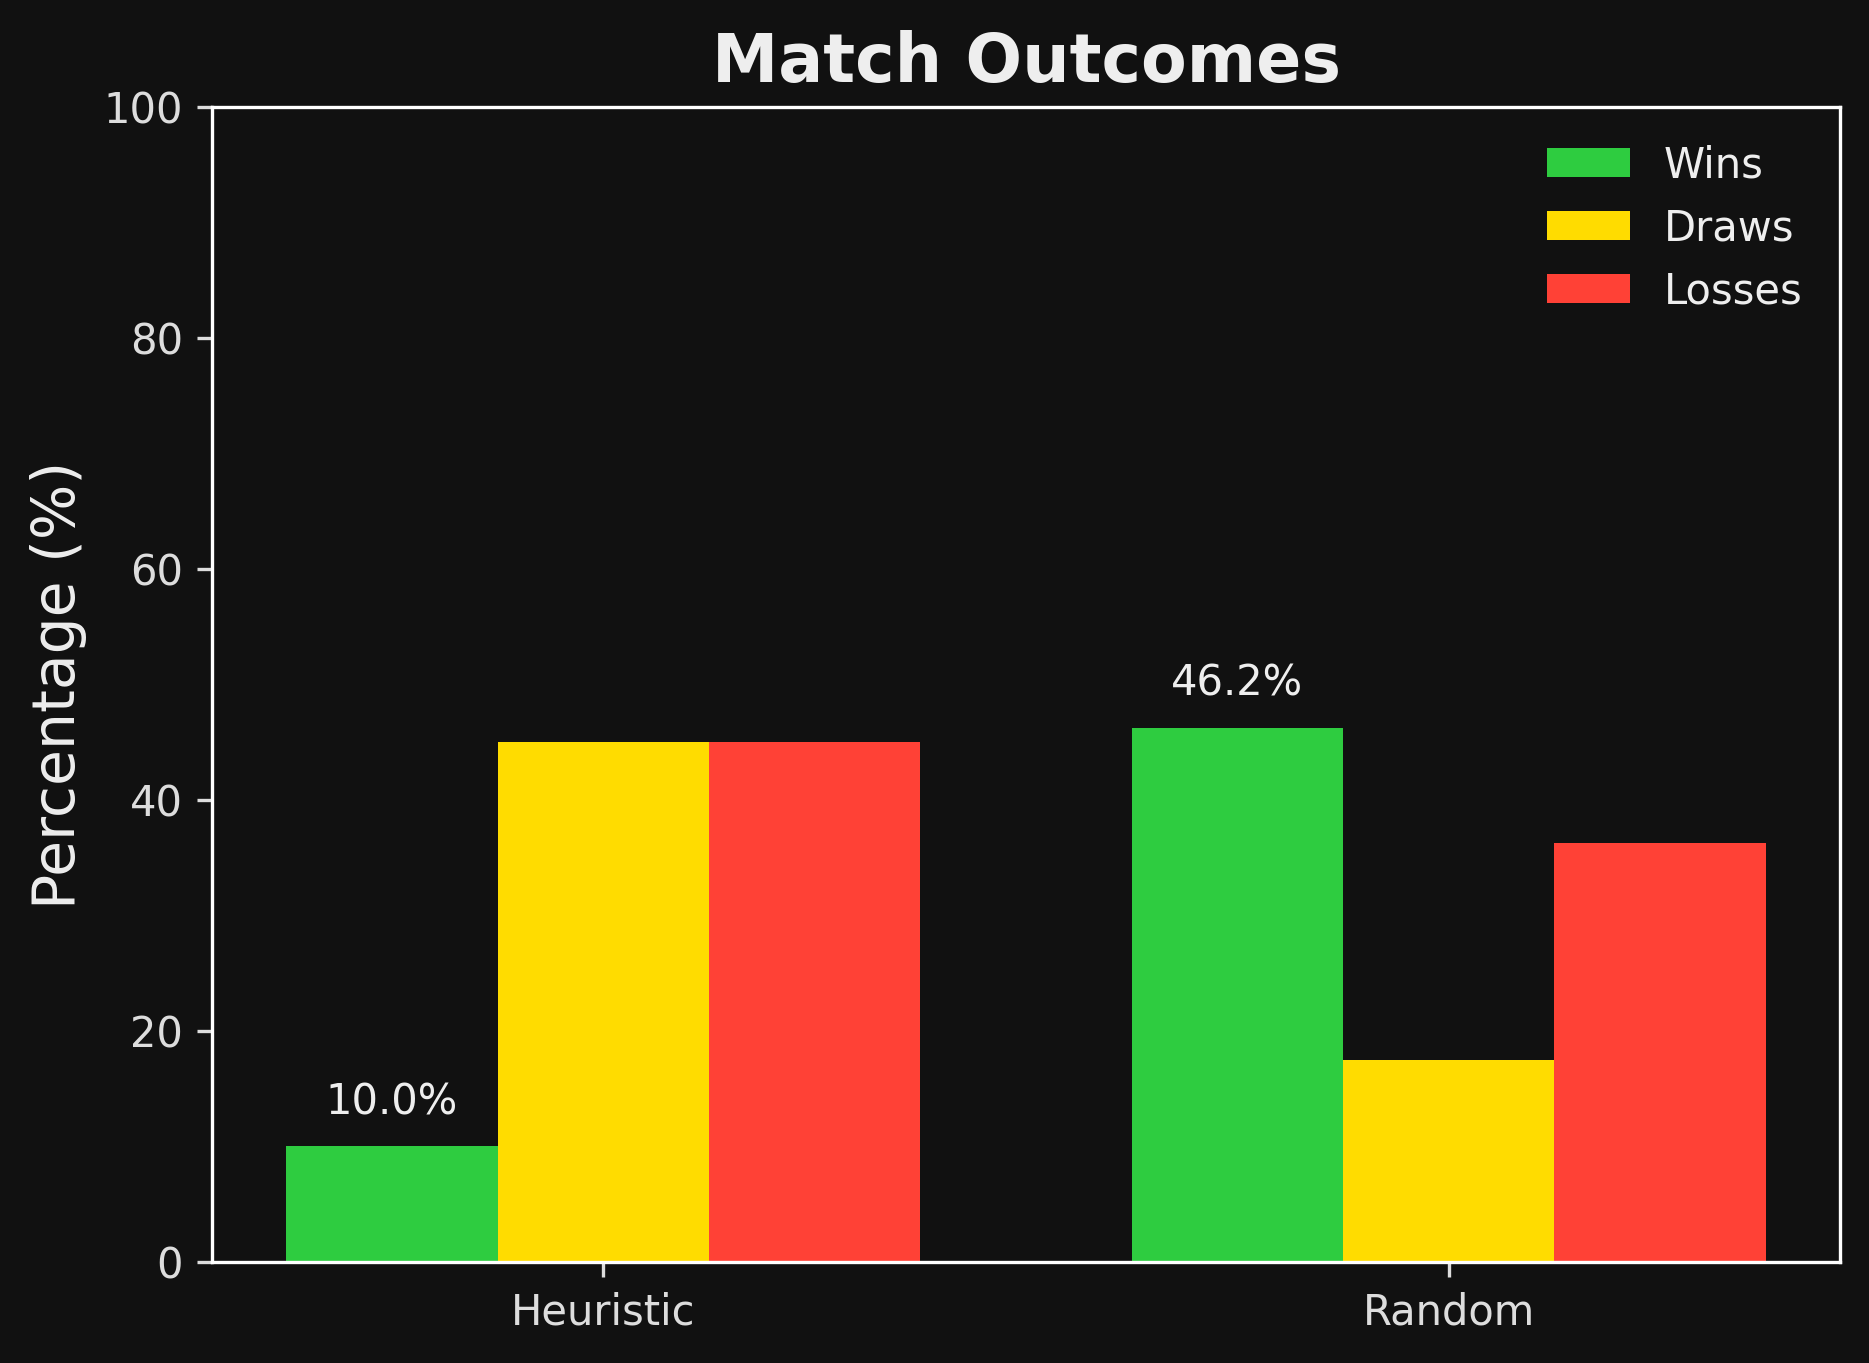

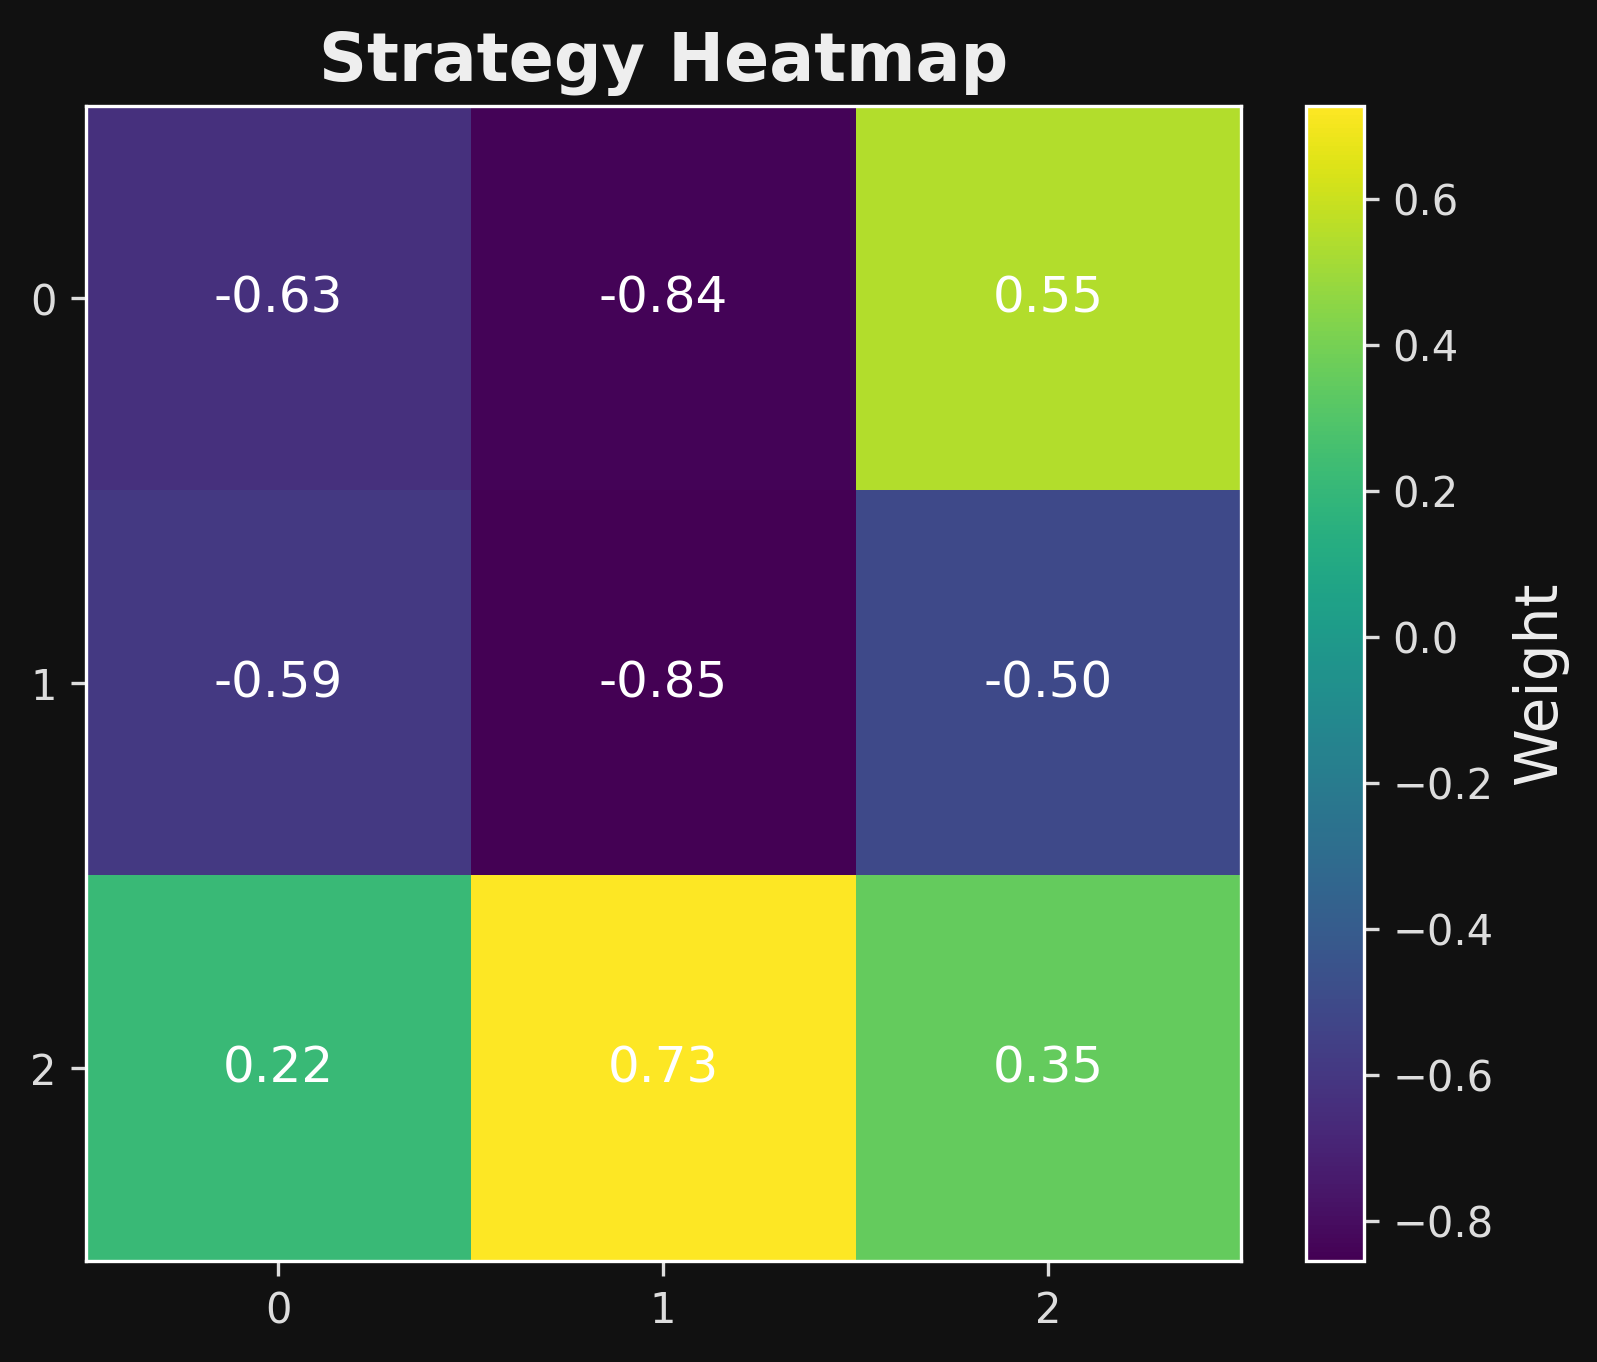

In [8]:
best_run = max(series.runs, key=lambda run: run.best_fitness)
aggregate_outcomes = aggregate_outcomes_by_opponent(series)

fitness_plot = plots.plot_fitness_curve(
    best_run.evolution.history,
    RESULTS_DIR / f"run{best_run.run_id}_fitness"
)
outcome_plot = plots.plot_outcome_bars(aggregate_outcomes, RESULTS_DIR / "outcomes")
heatmap_plot = plots.plot_weight_heatmap(
    best_run.evolution.best_weights,
    RESULTS_DIR / f"run{best_run.run_id}_heatmap",
)

display(Image(filename=fitness_plot["png"]))
display(Image(filename=outcome_plot["png"]))
display(Image(filename=heatmap_plot["png"]))

## 4. Tuning Comparison

gen	nevals	avg	max	min
0  	6     	0.5	0.5	0.5
1  	4     	0.5	0.5	0.5
2  	4     	0.541667	0.75	0.5
gen	nevals	avg 	max	min
0  	6     	0.25	0.5	0  
1  	5     	0.5 	0.5	0.5
2  	4     	0.416667	0.5	0  
gen	nevals	avg    	max 	min
0  	8     	0.40625	0.75	0  
1  	4     	0.5625 	0.75	0.25
2  	6     	0.65625	0.75	0.5 
gen	nevals	avg   	max 	min
0  	8     	0.4375	0.75	0  
1  	3     	0.5625	0.75	0.5
2  	4     	0.6875	0.75	0.5


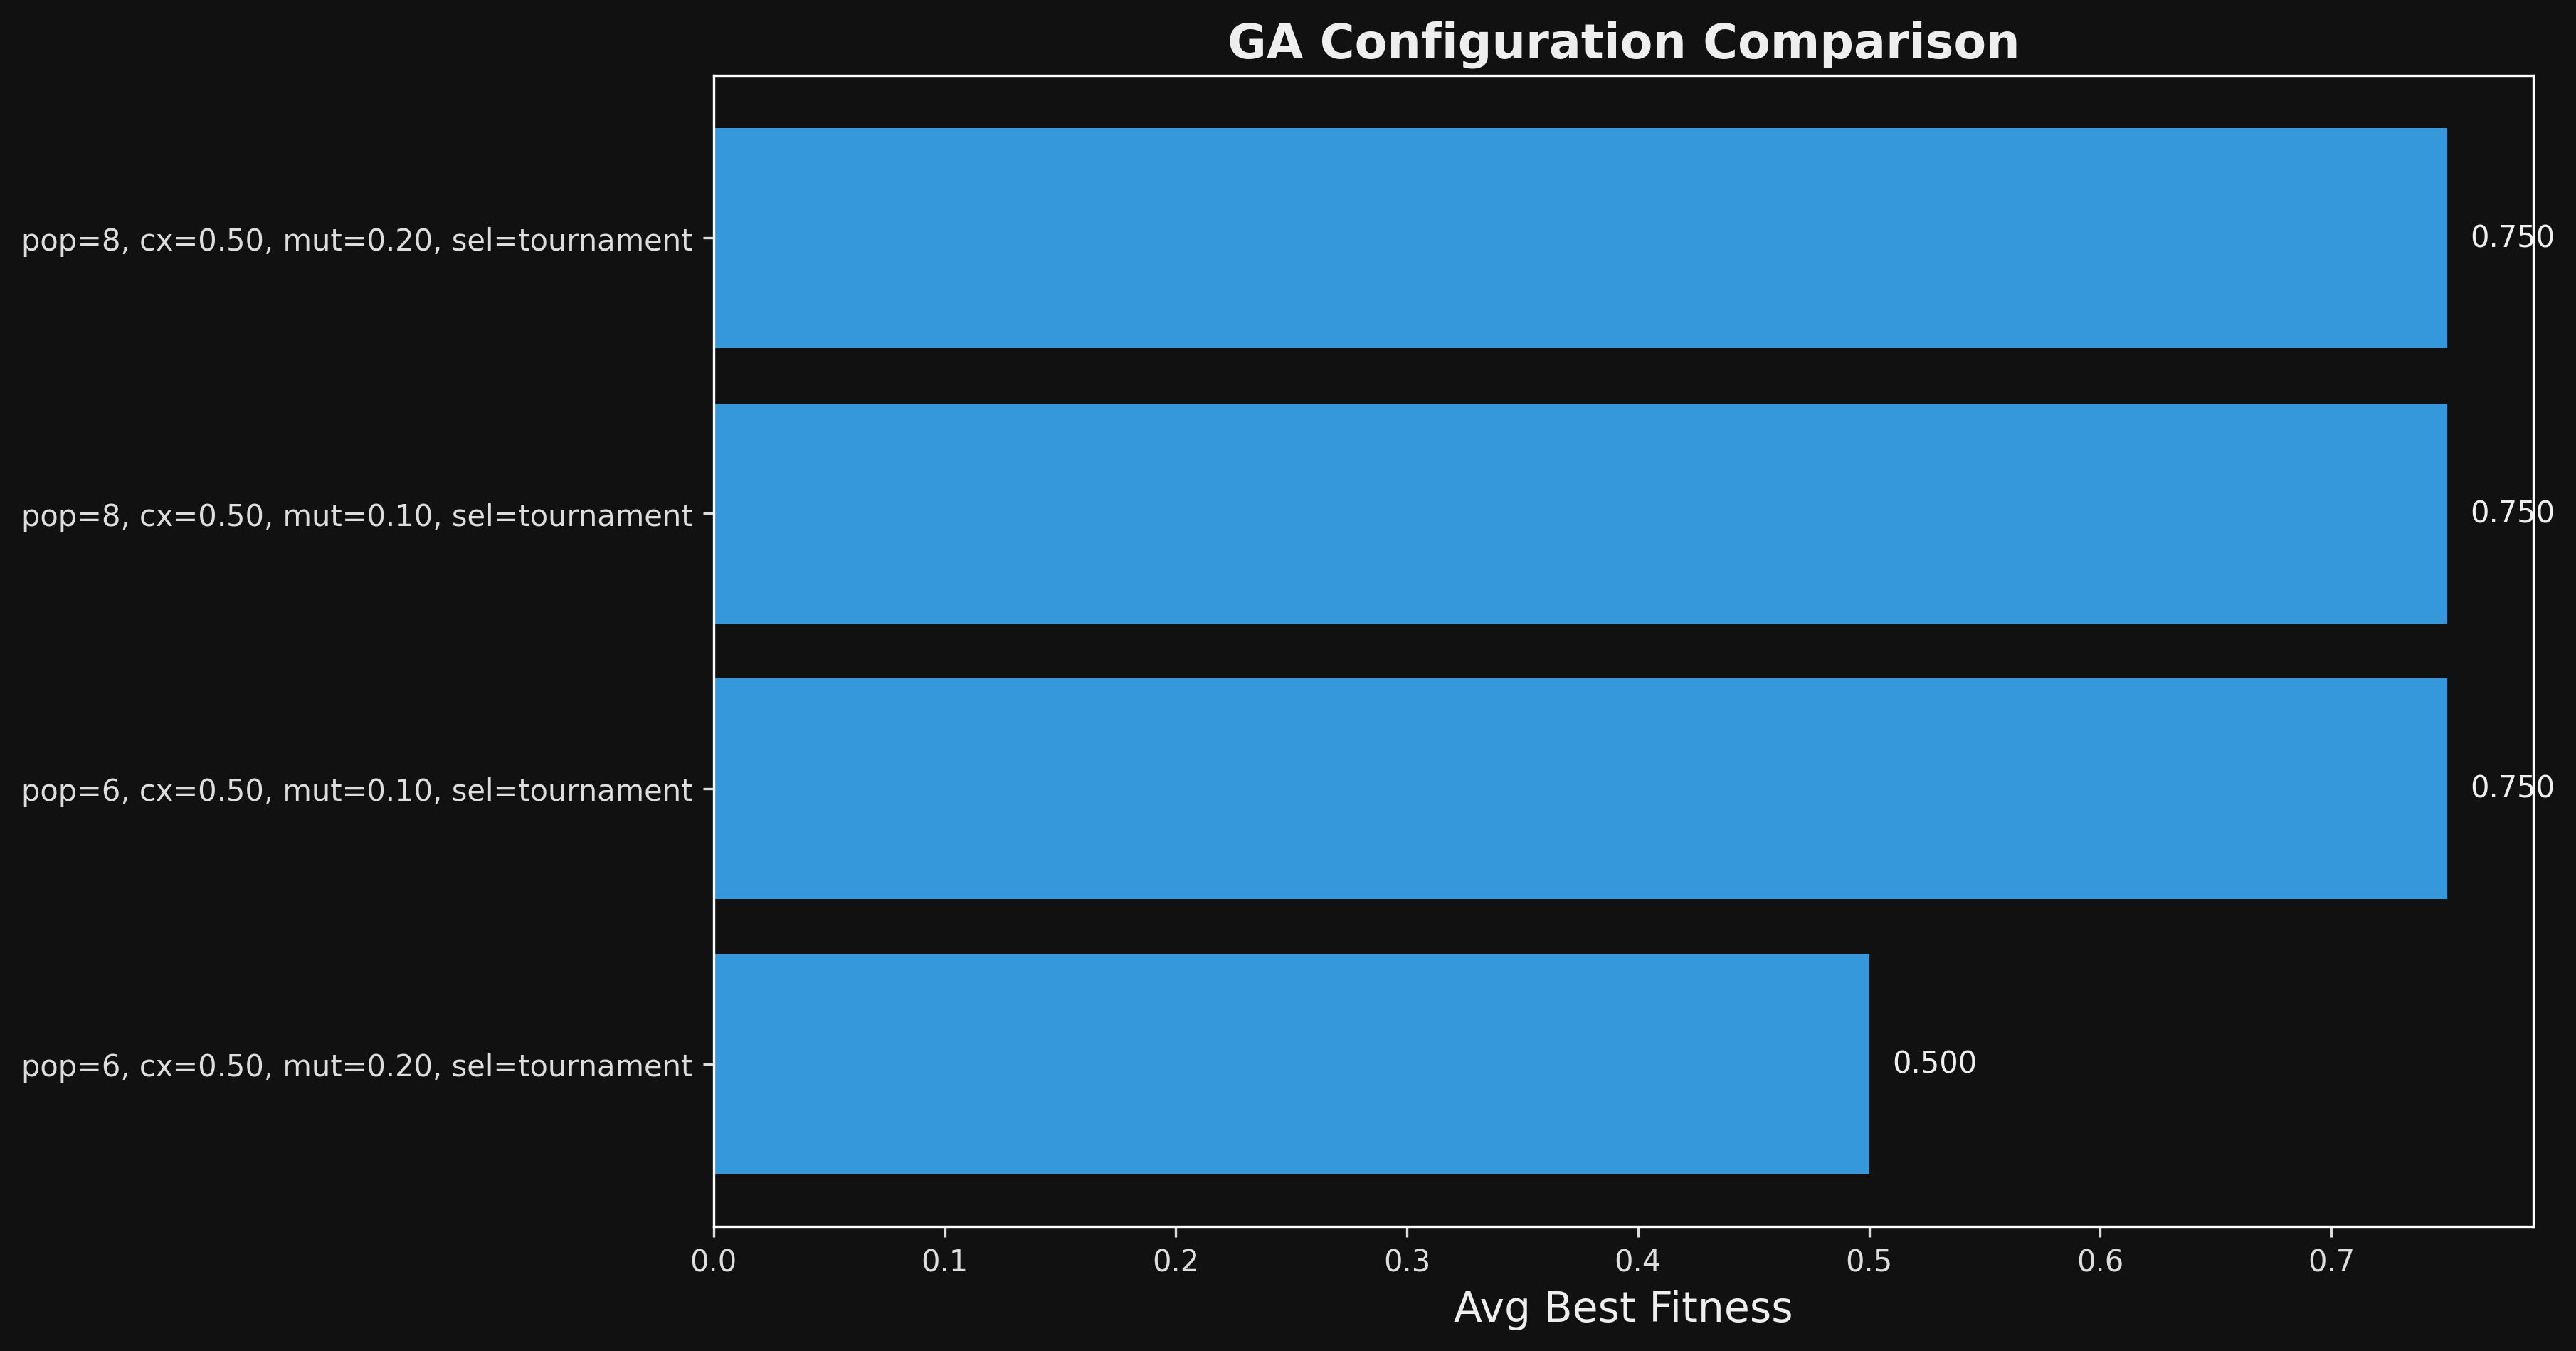

In [4]:
tuning_config = tuning.TuningConfig(
    populations=(6, 8),
    mutation_probs=(0.1, 0.2),
    crossover_probs=(0.5,),
    selections=("tournament",),
    generations=2,
    n_games=1,
    runs_per_setting=1,
    board_factory=lambda: Board(),
    base_seed=99,
)
tuning_records = tuning.grid_search(tuning_config)
comparison_paths = plots.plot_tuning_comparison(
    tuning_records,
    RESULTS_DIR / "tuning_comparison",
)
display(Image(filename=comparison_paths["png"]))